In [134]:
import gym
import neat
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Pendulum-v1')

def eval_genomes(genomes, config):
    for _, genome in genomes:
        genome.fitness = 0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        observation = env.reset()[0]
        terminated, truncated = False, False

        while not terminated and not truncated:
            a = net.activate(observation)
            neural_network_output = float(a[0])
            neural_network_output = neural_network_output * 4 -2
            observation, reward, terminated, truncated, _ = env.step(np.array([neural_network_output]))
            genome.fitness += reward

config_path = 'pendulum_config'  # Update with your NEAT configuration file path
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

population = neat.Population(config)
population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 30)



 ****** Running generation 0 ****** 

Population's average fitness: -1417.46991 stdev: 195.66575
Best fitness: -912.42504 - size: (9, 18) - species 22 - id 22
Average adjusted fitness: 0.308
Mean genetic distance 3.671, standard deviation 0.541
Population of 80 members in 40 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     2  -1627.7    0.020     0
     2    0     2  -1402.0    0.329     0
     3    0     2  -1574.3    0.093     0
     4    0     2  -1268.2    0.513     0
     5    0     2  -1596.1    0.064     0
     6    0     2  -1443.5    0.273     0
     7    0     2  -1596.6    0.063     0
     8    0     2  -1475.2    0.229     0
     9    0     2  -1301.9    0.466     0
    10    0     2  -1512.8    0.178     0
    11    0     2  -1508.2    0.184     0
    12    0     2  -1372.8    0.369     0
    13    0     2   -970.9    0.920     0
    14    0     2  -1584.4    0.079     0
    15    0     2  -1581.8    0.083     0


In [138]:
env = gym.make('Pendulum-v1', render_mode="human")
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
terminated, truncated = False, False
observation =  env.reset()[0]
while not terminated and not truncated:
    neural_network_output = winner_net.activate(observation)
    observation, reward, terminated, truncated, info = env.step(neural_network_output)
env.close()

In [136]:
import visualize

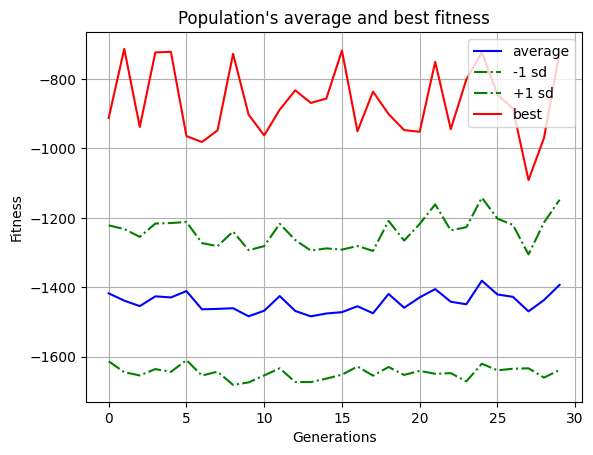

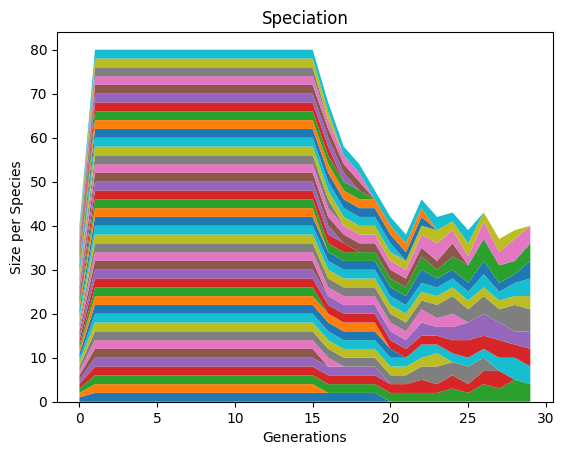

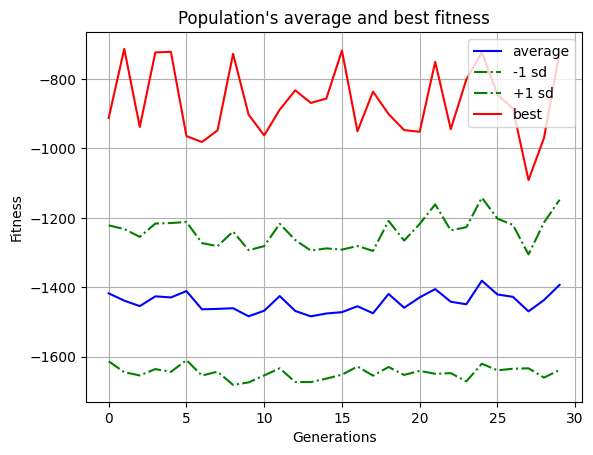

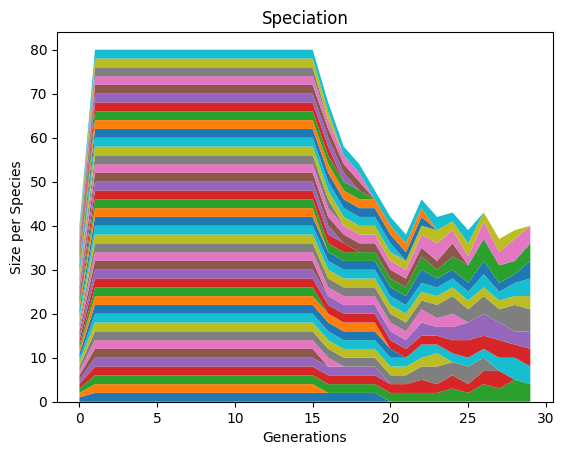

In [137]:
# Plot the statistics
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)